Dataset link : https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data/data

# **Necessary Libraries**

In [ ]:
# === CORE LIBRARIES ===
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# === INSTALLATIONS (ensure availability) ===
!pip install -q missingno category_encoders xgboost

# === DATA VISUALIZATION ===
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# === ENCODING & SCALING ===
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import TargetEncoder  # Corrected import

# === DATA SPLITTING ===
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# === CLASSICAL MODELS ===
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# === BOOSTED MODELS ===
from xgboost import XGBClassifier

# === MODEL EVALUATION ===
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, r2_score
)

from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


# **Load and Preview of Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/11. Spring 25/CSE427/Project/fraud_data.csv') #Loading Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [ ]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


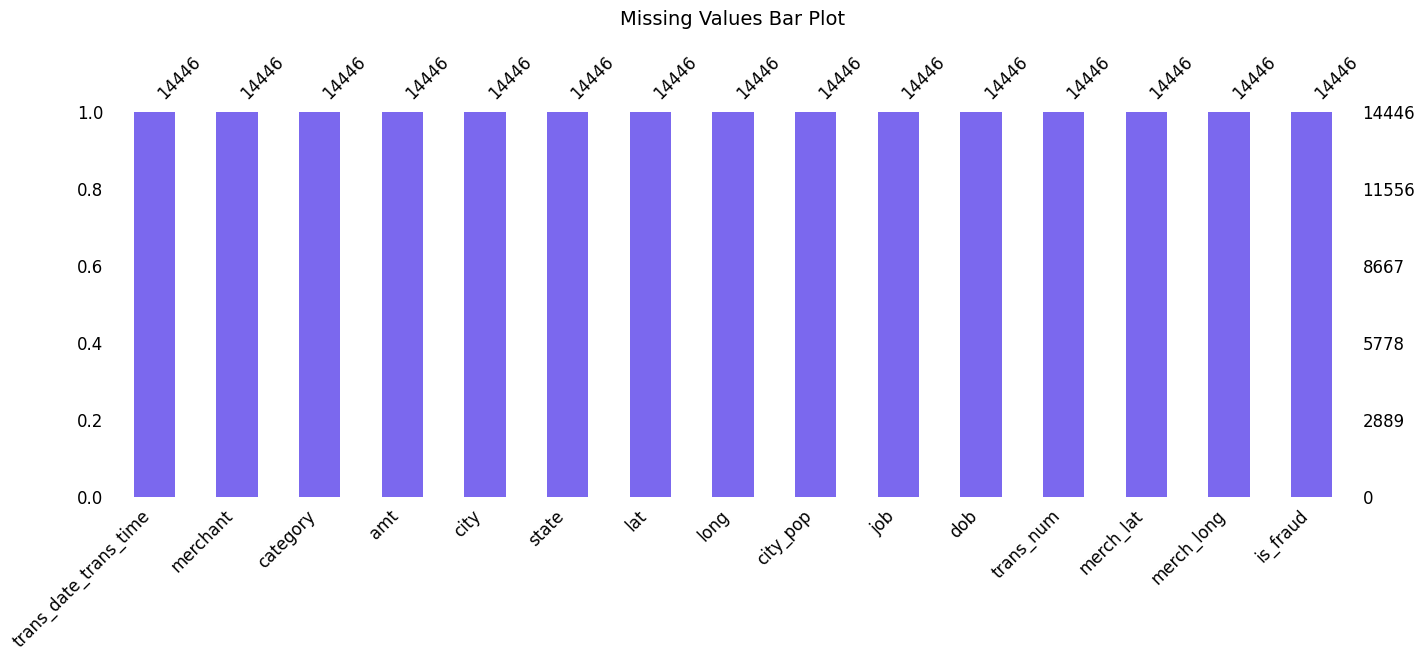

In [ ]:
!pip install missingno

# import missingno as msno
# import matplotlib.pyplot as plt

msno.bar(df, figsize=(16, 5), color="#7B68EE", fontsize=12)
plt.title("Missing Values Bar Plot", pad=20, fontsize=14)
plt.show()

In [ ]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'trans_date_trans_time' has '12126' unique values
Feature 'merchant' has '693' unique values
Feature 'category' has '14' unique values
Feature 'amt' has '9266' unique values
Feature 'city' has '176' unique values
Feature 'state' has '13' unique values
Feature 'lat' has '183' unique values
Feature 'long' has '183' unique values
Feature 'city_pop' has '174' unique values
Feature 'job' has '163' unique values
Feature 'dob' has '187' unique values
Feature 'trans_num' has '14383' unique values
Feature 'merch_lat' has '14376' unique values
Feature 'merch_long' has '14380' unique values
Feature 'is_fraud' has '4' unique values


<Axes: xlabel='is_fraud', ylabel='count'>

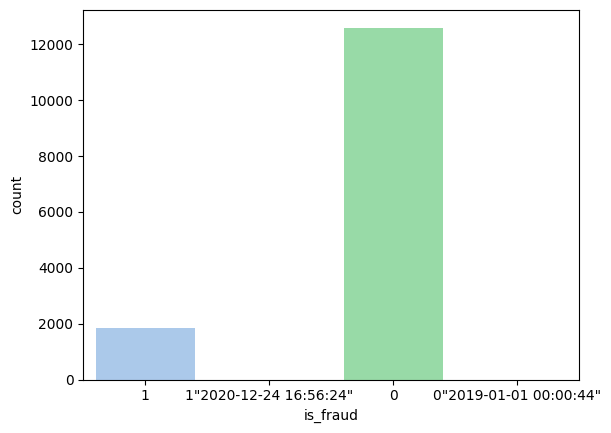

In [ ]:
sns.countplot(x='is_fraud',data=df,palette='pastel')

# **Data Pre Processing**

***Data Cleaning***

Handling Duplicate values

In [ ]:
df.duplicated().sum()

np.int64(63)

In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   merchant               14383 non-null  object 
 2   category               14383 non-null  object 
 3   amt                    14383 non-null  float64
 4   city                   14383 non-null  object 
 5   state                  14383 non-null  object 
 6   lat                    14383 non-null  float64
 7   long                   14383 non-null  float64
 8   city_pop               14383 non-null  int64  
 9   job                    14383 non-null  object 
 10  dob                    14383 non-null  object 
 11  trans_num              14383 non-null  object 
 12  merch_lat              14383 non-null  float64
 13  merch_long             14383 non-null  float64
 14  is_fraud               14383 non-null  object 
dtypes: floa

np.int64(0)

In [ ]:
df.duplicated().sum()  #CHECKING FOR DUPLICATE VALUES

np.int64(0)

Handling Invalid "is_fraud" column data

In [ ]:
#  Checking the column names "is_fraud" for invalid values other than "0" and "1"
df[(df['is_fraud']!='0') & (df['is_fraud']!='1')]  # Checking of other 0 and 1 any other value is stored here or not

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
1781,11-12-2020 23:19,Thompson-Gleason,health_fitness,19.45,Lakeport,CA,39.0470,-122.9328,11256,Podiatrist,18-10-1972,bfde75d978bb9905a4a8c87440692a4c,39.251880,-122.490946,"1""2020-12-24 16:56:24"""
7780,31-12-2020 23:59,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,"0""2019-01-01 00:00:44"""


In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1781
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [ ]:
df.loc[[1781], 'is_fraud']= '1'  #Correctly replacing with proper values
df.loc[[7780], 'is_fraud']= '0'

In [ ]:
df[(df['is_fraud']!='0') & (df['is_fraud']!='1')] #Checking again for invalid values

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud


In [ ]:
df['is_fraud']= df['is_fraud'].astype('int')  # Converting string type to integer type for saving space

In [ ]:
df.describe(include='all')

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
count,14383,14383,14383,14383.000000,14383,14383,14383.000000,14383.000000,1.438300e+04,14383,14383,14383,14383.000000,14383.000000,14383.000000
unique,12126,693,14,NaN,176,13,NaN,NaN,NaN,163,187,14383,NaN,NaN,NaN
top,29-12-2020 16:57,Kilback LLC,grocery_pos,NaN,Phoenix,CA,NaN,NaN,NaN,"""Surveyor, minerals""",17-07-1989,65e7370f473f9b9d75796c8033a7c929,NaN,NaN,NaN
freq,5,58,1591,NaN,297,3366,NaN,NaN,NaN,250,197,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,122.719068,NaN,NaN,39.761571,-110.835395,1.063921e+05,NaN,NaN,NaN,39.761755,-110.836186,0.123896
std,NaN,NaN,NaN,228.879064,NaN,NaN,5.266532,12.877931,2.900439e+05,NaN,NaN,NaN,5.309190,12.887765,0.329475
min,NaN,NaN,NaN,1.000000,NaN,NaN,20.027100,-165.672300,4.600000e+01,NaN,NaN,NaN,19.032689,-166.670685,0.000000
25%,NaN,NaN,NaN,11.945000,NaN,NaN,36.715400,-120.282400,4.930000e+02,NaN,NaN,NaN,36.768908,-120.095775,0.000000
50%,NaN,NaN,NaN,51.290000,NaN,NaN,39.666200,-111.098500,1.645000e+03,NaN,NaN,NaN,39.613766,-111.203646,0.000000
75%,NaN,NaN,NaN,100.140000,NaN,NaN,41.940400,-101.136000,3.543900e+04,NaN,NaN,NaN,42.275391,-100.556920,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   merchant               14383 non-null  object 
 2   category               14383 non-null  object 
 3   amt                    14383 non-null  float64
 4   city                   14383 non-null  object 
 5   state                  14383 non-null  object 
 6   lat                    14383 non-null  float64
 7   long                   14383 non-null  float64
 8   city_pop               14383 non-null  int64  
 9   job                    14383 non-null  object 
 10  dob                    14383 non-null  object 
 11  trans_num              14383 non-null  object 
 12  merch_lat              14383 non-null  float64
 13  merch_long             14383 non-null  float64
 14  is_fraud               14383 non-null  int64  
dtypes: floa

In [ ]:
# CHECK FOR MISSING VALUES
df.isna().sum().sum()

np.int64(0)

**CONVERSION OF 'trans_date_trans_time' AND 'dob' TO DATATIME[datetime64[ns]]**

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
# df['trans_date_trans_time'].dt.day   ## USE TO ACCESS
print(df[['trans_date_trans_time', 'dob']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   dob                    14383 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 853.1 KB
None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  object        
 2   category               14383 non-null  object        
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  object        
 5   state                  14383 non-null  object        
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  object        
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  object        
 12  merch_lat              14383 non-null  float64       
 13  merch_

**CHECING COLUMN NAMES AND USING APPROPRIATE NAMES**

In [ ]:
df.columns.values

array(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'merch_lat', 'merch_long', 'is_fraud'], dtype=object)

In [ ]:
# CHANGE COLUMNS NAMES WITH MORE APPROPRIATE NAMES
cols = ['trans_date_time', 'merchant_name', 'purchase_category', 'amount', 'purchase_city',
       'purchase_state', 'purchase_city_lat', 'purchase_city_long', 'city_population', 'occupation', 'dateofbirth', 'trans_num',
       'merch_lat', 'merch_long', 'is_fraud']
df.columns = cols
df.head(2)

,trans_date_time,merchant_name,purchase_category,amount,purchase_city,purchase_state,purchase_city_lat,purchase_city_long,city_population,occupation,dateofbirth,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-04 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1


In [ ]:
df['trans_year'] = df['trans_date_time'].dt.year # CREATING SEPARATE COLUMN OF "YEAR" FROM 'trans_date_time'
df['trans_month'] = df['trans_date_time'].dt.month # CREATING SEPARATE COLUMN OF "MONTH" FROM 'trans_date_time'
df['trans_day'] = df['trans_date_time'].dt.day # CREATING SEPARATE COLUMN OF "DAY" FROM 'trans_date_time'
df['trans_hour'] = df['trans_date_time'].dt.hour # CREATING SEPARATE COLUMN OF "HOUR" FROM 'trans_date_time'
df['age'] = df['trans_date_time'].dt.year-df['dateofbirth'].dt.year # CREATING SEPARATE COLUMN OF "AGE" FROM 'trans_date_time' AND "dob"
df.head()

,trans_date_time,merchant_name,purchase_category,amount,purchase_city,purchase_state,purchase_city_lat,purchase_city_long,city_population,occupation,dateofbirth,trans_num,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,age
0,2019-01-04 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,2019,1,4,0,80
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,2019,1,4,15,80
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,2019,1,4,22,80
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,2019,1,4,23,80
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,2019,1,4,23,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   trans_date_time     14383 non-null  datetime64[ns]
 1   merchant_name       14383 non-null  object        
 2   purchase_category   14383 non-null  object        
 3   amount              14383 non-null  float64       
 4   purchase_city       14383 non-null  object        
 5   purchase_state      14383 non-null  object        
 6   purchase_city_lat   14383 non-null  float64       
 7   purchase_city_long  14383 non-null  float64       
 8   city_population     14383 non-null  int64         
 9   occupation          14383 non-null  object        
 10  dateofbirth         14383 non-null  datetime64[ns]
 11  trans_num           14383 non-null  object        
 12  merch_lat           14383 non-null  float64       
 13  merch_long          14383 non-null  float64       


In [ ]:
df.drop(columns=['trans_date_time', 'dateofbirth'], inplace=True) #DROPPING 'trans_date_time' AND 'dateofbirth'
df.head()

,merchant_name,purchase_category,amount,purchase_city,purchase_state,purchase_city_lat,purchase_city_long,city_population,occupation,trans_num,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,age
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,2019,1,4,0,80
1,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,2019,1,4,15,80
2,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,2019,1,4,22,80
3,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,2019,1,4,23,80
4,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,2019,1,4,23,80


In [ ]:
# SETTING ORDER FOR COLUMN NAMES
new_column_order = ['trans_num', 'trans_year', 'trans_month', 'trans_day', 'trans_hour',
                    'purchase_category', 'purchase_city', 'city_population', 'purchase_state',
                    'purchase_city_lat', 'purchase_city_long', 'amount',
                    'age', 'occupation', 'merchant_name', 'merch_lat', 'merch_long', 'is_fraud']
df = df[new_column_order]
print(df.shape)
df.head()

(14383, 18)


,trans_num,trans_year,trans_month,trans_day,trans_hour,purchase_category,purchase_city,city_population,purchase_state,purchase_city_lat,purchase_city_long,amount,age,occupation,merchant_name,merch_lat,merch_long,is_fraud
0,a3806e984cec6ac0096d8184c64ad3a1,2019,1,4,0,grocery_net,Wales,145,AK,64.7556,-165.6723,14.37,80,"""Administrator, education""","""Stokes, Christiansen and Sipes""",65.654142,-164.722603,1
1,a59185fe1b9ccf21323f581d7477573f,2019,1,4,15,shopping_net,Wales,145,AK,64.7556,-165.6723,966.11,80,"""Administrator, education""",Predovic Inc,65.468863,-165.473127,1
2,86ba3a888b42cd3925881fa34177b4e0,2019,1,4,22,misc_pos,Wales,145,AK,64.7556,-165.6723,49.61,80,"""Administrator, education""",Wisozk and Sons,65.347667,-165.914542,1
3,3a068fe1d856f0ecedbed33e4b5f4496,2019,1,4,23,grocery_pos,Wales,145,AK,64.7556,-165.6723,295.26,80,"""Administrator, education""",Murray-Smitham,64.445035,-166.080207,1
4,891cdd1191028759dc20dc224347a0ff,2019,1,4,23,health_fitness,Wales,145,AK,64.7556,-165.6723,18.17,80,"""Administrator, education""",Friesen Lt,65.447094,-165.446843,1


In [ ]:
# Drop 'trans_num' as it is not required here - for model
df.drop(columns=['trans_num'], inplace=True)
df.head()

,trans_year,trans_month,trans_day,trans_hour,purchase_category,purchase_city,city_population,purchase_state,purchase_city_lat,purchase_city_long,amount,age,occupation,merchant_name,merch_lat,merch_long,is_fraud
0,2019,1,4,0,grocery_net,Wales,145,AK,64.7556,-165.6723,14.37,80,"""Administrator, education""","""Stokes, Christiansen and Sipes""",65.654142,-164.722603,1
1,2019,1,4,15,shopping_net,Wales,145,AK,64.7556,-165.6723,966.11,80,"""Administrator, education""",Predovic Inc,65.468863,-165.473127,1
2,2019,1,4,22,misc_pos,Wales,145,AK,64.7556,-165.6723,49.61,80,"""Administrator, education""",Wisozk and Sons,65.347667,-165.914542,1
3,2019,1,4,23,grocery_pos,Wales,145,AK,64.7556,-165.6723,295.26,80,"""Administrator, education""",Murray-Smitham,64.445035,-166.080207,1
4,2019,1,4,23,health_fitness,Wales,145,AK,64.7556,-165.6723,18.17,80,"""Administrator, education""",Friesen Lt,65.447094,-165.446843,1


In [ ]:
# Part 2

In [ ]:
# TURNING "purchase_category" & "occupation" into numeric data type

# Label Encoding for 'purchase_category' (purchase category)
category_mapping = {category: idx for idx, category in enumerate(df['purchase_category'].unique())}
df['purchase_category_encoded'] = df['purchase_category'].map(category_mapping)

# Label Encoding for 'occupation'
job_mapping = {job: idx for idx, job in enumerate(df['occupation'].unique())}
df['job_encoded'] = df['occupation'].map(job_mapping)

print(df[['purchase_category', 'purchase_category_encoded', 'occupation', 'job_encoded']].head())

  purchase_category  purchase_category_encoded                  occupation  \
0       grocery_net                          0  "Administrator, education"   
1      shopping_net                          1  "Administrator, education"   
2          misc_pos                          2  "Administrator, education"   
3       grocery_pos                          3  "Administrator, education"   
4    health_fitness                          4  "Administrator, education"   

   job_encoded  
0            0  
1            0  
2            0  
3            0  
4            0  


In [ ]:
df.head()

,trans_year,trans_month,trans_day,trans_hour,purchase_category,purchase_city,city_population,purchase_state,purchase_city_lat,purchase_city_long,amount,age,occupation,merchant_name,merch_lat,merch_long,is_fraud,purchase_category_encoded,job_encoded
0,2019,1,4,0,grocery_net,Wales,145,AK,64.7556,-165.6723,14.37,80,"""Administrator, education""","""Stokes, Christiansen and Sipes""",65.654142,-164.722603,1,0,0
1,2019,1,4,15,shopping_net,Wales,145,AK,64.7556,-165.6723,966.11,80,"""Administrator, education""",Predovic Inc,65.468863,-165.473127,1,1,0
2,2019,1,4,22,misc_pos,Wales,145,AK,64.7556,-165.6723,49.61,80,"""Administrator, education""",Wisozk and Sons,65.347667,-165.914542,1,2,0
3,2019,1,4,23,grocery_pos,Wales,145,AK,64.7556,-165.6723,295.26,80,"""Administrator, education""",Murray-Smitham,64.445035,-166.080207,1,3,0
4,2019,1,4,23,health_fitness,Wales,145,AK,64.7556,-165.6723,18.17,80,"""Administrator, education""",Friesen Lt,65.447094,-165.446843,1,4,0


In [ ]:
# SETTING ORDER FOR COLUMN NAMES
new_column_order = ['trans_year', 'trans_month', 'trans_day', 'trans_hour',
                    'purchase_category', 'purchase_category_encoded', 'purchase_city', 'city_population', 'purchase_state',
                    'purchase_city_lat', 'purchase_city_long', 'amount',
                    'age', 'occupation', 'job_encoded', 'merchant_name', 'merch_lat', 'merch_long', 'is_fraud']
df = df[new_column_order]
print(df.shape)
df.head()

(14383, 19)


,trans_year,trans_month,trans_day,trans_hour,purchase_category,purchase_category_encoded,purchase_city,city_population,purchase_state,purchase_city_lat,purchase_city_long,amount,age,occupation,job_encoded,merchant_name,merch_lat,merch_long,is_fraud
0,2019,1,4,0,grocery_net,0,Wales,145,AK,64.7556,-165.6723,14.37,80,"""Administrator, education""",0,"""Stokes, Christiansen and Sipes""",65.654142,-164.722603,1
1,2019,1,4,15,shopping_net,1,Wales,145,AK,64.7556,-165.6723,966.11,80,"""Administrator, education""",0,Predovic Inc,65.468863,-165.473127,1
2,2019,1,4,22,misc_pos,2,Wales,145,AK,64.7556,-165.6723,49.61,80,"""Administrator, education""",0,Wisozk and Sons,65.347667,-165.914542,1
3,2019,1,4,23,grocery_pos,3,Wales,145,AK,64.7556,-165.6723,295.26,80,"""Administrator, education""",0,Murray-Smitham,64.445035,-166.080207,1
4,2019,1,4,23,health_fitness,4,Wales,145,AK,64.7556,-165.6723,18.17,80,"""Administrator, education""",0,Friesen Lt,65.447094,-165.446843,1


In [ ]:
#Checking if coversion of purchase_category" and "Occupation" to numeric values was properly done or not

print(df['purchase_category_encoded'].unique())  # After encoding
print(df['job_encoded'].unique())      # After encoding

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162]


# **CREATING CORRELATION HEATMAP**

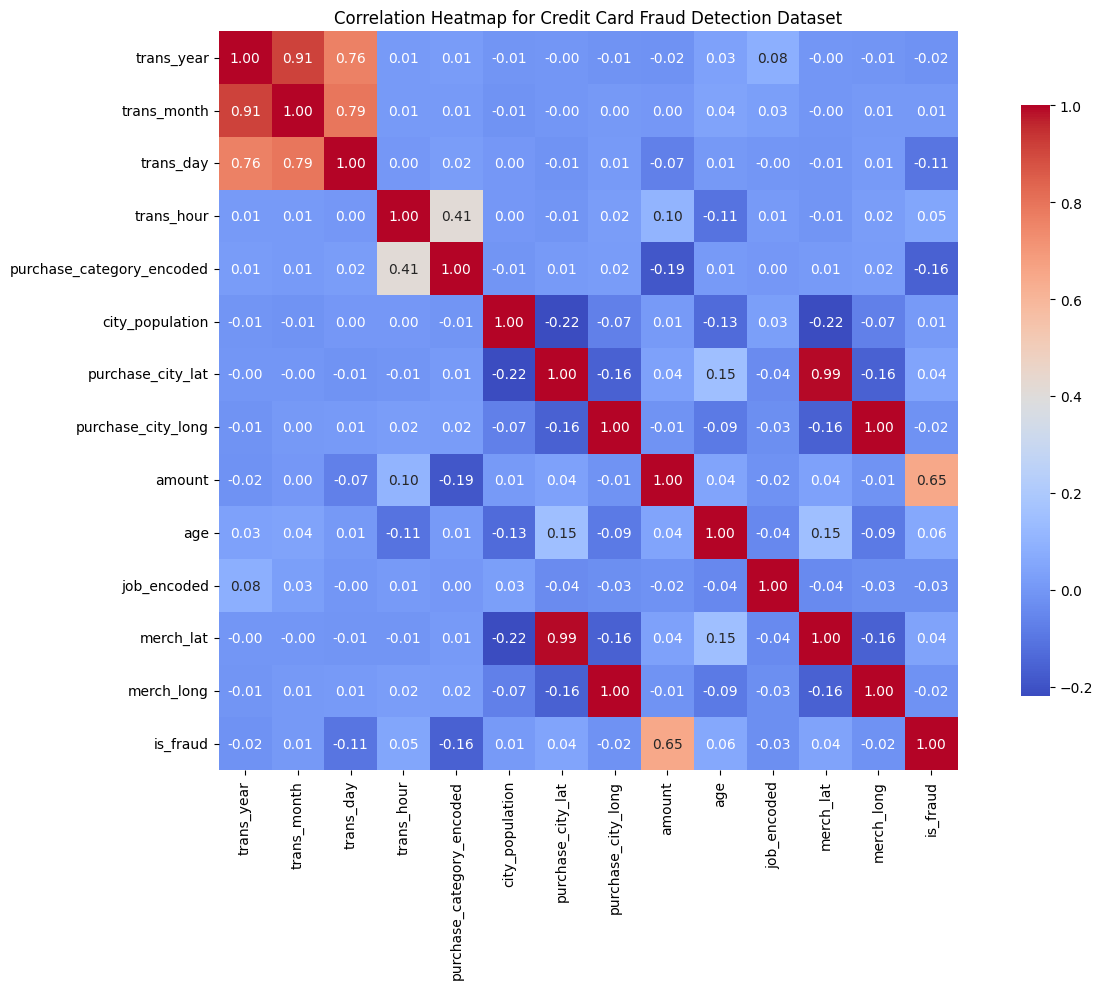

In [ ]:
# Correlation heatmap

# Generate correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap for Credit Card Fraud Detection Dataset")
plt.tight_layout()
plt.show()


In [ ]:
# DROPPING COLUMNS THAT ARE NOT NEEDED FOR MODEL TRAINING AND TO INCREASE PREDICTION ACCURACY

columns_to_drop = [
    'purchase_city_lat',
    'purchase_city_long',
    'trans_year',
    'trans_month',
    'trans_day',
    'occupation',
    'purchase_category'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the remaining columns
print("Remaining columns after dropping:")
print(df.columns.tolist())

Remaining columns after dropping:
['trans_hour', 'purchase_category_encoded', 'purchase_city', 'city_population', 'purchase_state', 'amount', 'age', 'job_encoded', 'merchant_name', 'merch_lat', 'merch_long', 'is_fraud']


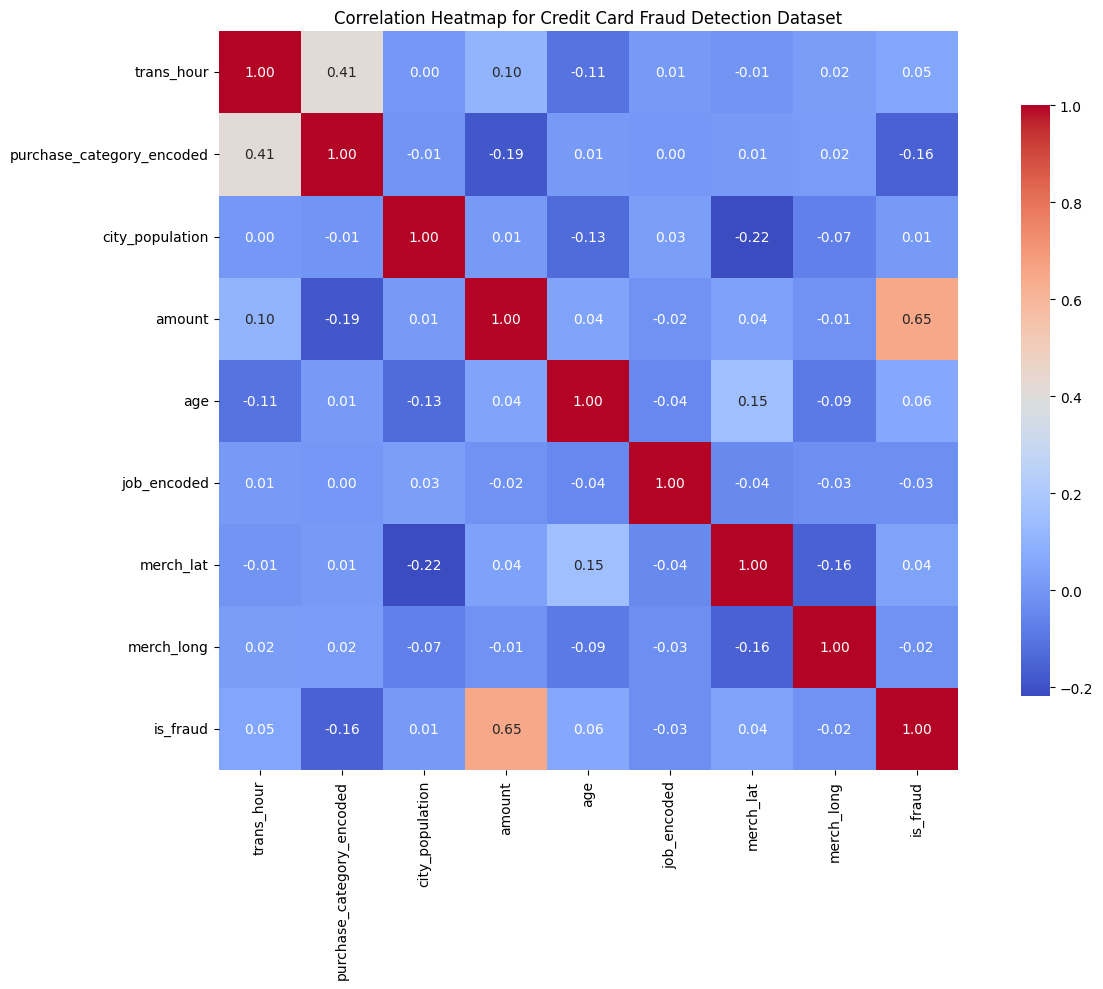

In [ ]:
# Correlation heatmap

# Generate correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap for Credit Card Fraud Detection Dataset")
plt.tight_layout()
plt.show()


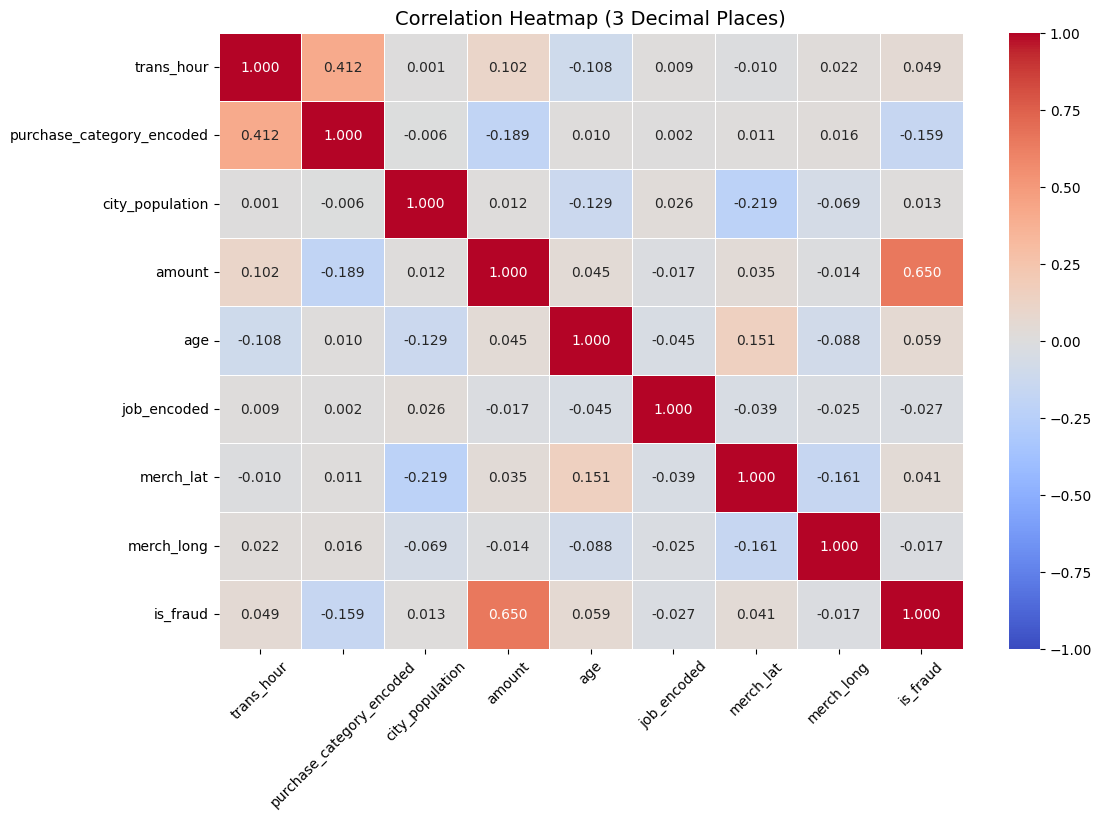

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# Example correlation matrix (replace with your actual data)
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()

# Create heatmap with adjusted annotations
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",  # Show 3 decimal places
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 10}  # Adjust font size
)

plt.title("Correlation Heatmap (3 Decimal Places)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<Axes: xlabel='is_fraud', ylabel='count'>

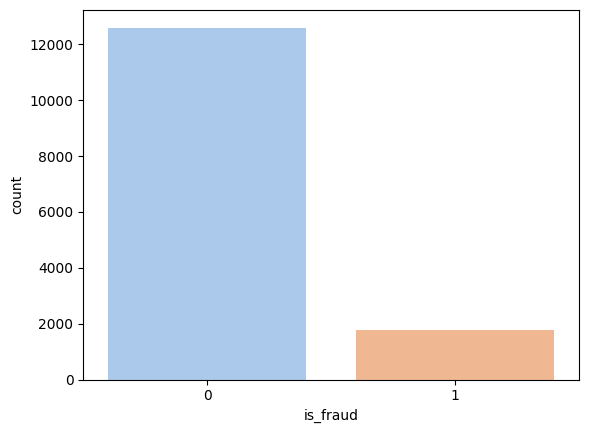

In [ ]:
sns.countplot(x='is_fraud',data=df,palette='pastel')

# **ML Implementation**

In [ ]:
df.head()

,trans_hour,purchase_category_encoded,purchase_city,city_population,purchase_state,amount,age,job_encoded,merchant_name,merch_lat,merch_long,is_fraud
0,0,0,Wales,145,AK,14.37,80,0,"""Stokes, Christiansen and Sipes""",65.654142,-164.722603,1
1,15,1,Wales,145,AK,966.11,80,0,Predovic Inc,65.468863,-165.473127,1
2,22,2,Wales,145,AK,49.61,80,0,Wisozk and Sons,65.347667,-165.914542,1
3,23,3,Wales,145,AK,295.26,80,0,Murray-Smitham,64.445035,-166.080207,1
4,23,4,Wales,145,AK,18.17,80,0,Friesen Lt,65.447094,-165.446843,1


***Random  Forest Classifier***

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3780
           1       0.94      0.78      0.85       535

    accuracy                           0.97      4315
   macro avg       0.95      0.89      0.92      4315
weighted avg       0.97      0.97      0.97      4315


ROC-AUC Score: 0.9833


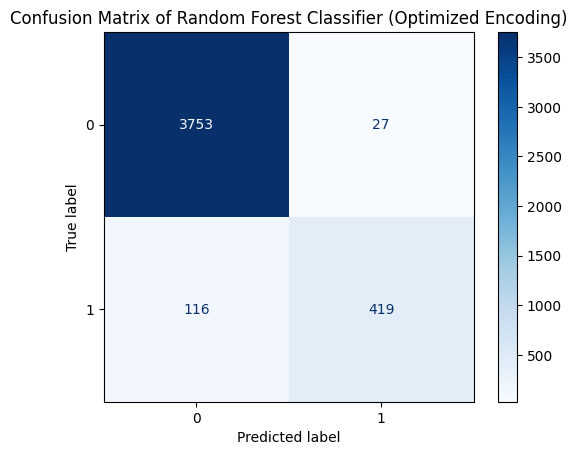

In [ ]:
df_encoded = df.copy()

# Data encoding
nominal_cols = ['purchase_city', 'purchase_state']  # used One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

high_cardinality_cols = ['merchant_name']  # for too many unique values used Target Encoding
encoder = TargetEncoder()
df_encoded[high_cardinality_cols] = encoder.fit_transform(
    df_encoded[high_cardinality_cols],
    df_encoded['is_fraud']
)

ordinal_mappings = {

}
# Didnt use it
for col, mapping in ordinal_mappings.items():  # used manual encoding for age and city_population
    df_encoded[col] = df_encoded[col].map(mapping)

# Feature and Target column setting
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

# Splitting Dataset for Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, #30% data for testing
    random_state=42, #ensuring reproducibility
    stratify=y  # Critical for imbalanced datasets
)

# Training
rf = RandomForestClassifier(
    n_estimators=100, #number of trees
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced classes
)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Needed for AUC score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)  # Use probabilities, not hard predictions
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest Classifier (Optimized Encoding)")
plt.show()

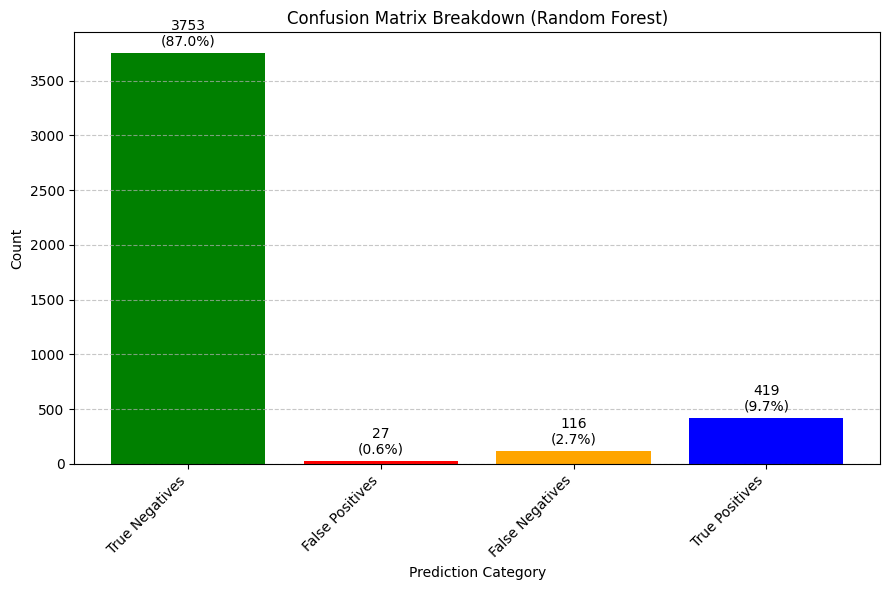

In [ ]:
# Compute confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn, fp, fn, tp]
colors = ['green', 'red', 'orange', 'blue']
total = sum(values) # Total number of predictions

plt.figure(figsize=(9, 6))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    height = bar.get_height()
    percentage = f'({height / total:.1%})'
    plt.annotate(f'{height}\n{percentage}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.title('Confusion Matrix Breakdown (Random Forest)', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Prediction Category', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Linear Regression***


Regression Metrics:
RMSE: 0.2314
R² Score: 0.5069

Classification Metrics:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3780
           1       0.91      0.55      0.68       535

    accuracy                           0.94      4315
   macro avg       0.92      0.77      0.82      4315
weighted avg       0.94      0.94      0.93      4315

ROC-AUC: 0.8875


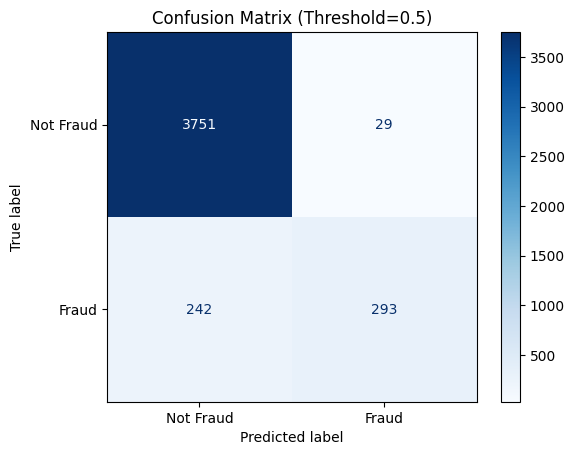

In [ ]:
df_encoded = df.copy()

# Data encoding
nominal_cols = ['purchase_city', 'purchase_state']  #used One-Hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

high_cardinality_cols = ['merchant_name']
encoder = TargetEncoder()  #use Target Encoding for high-cardinality Columns
df_encoded[high_cardinality_cols] = encoder.fit_transform(
    df_encoded[high_cardinality_cols],
    df_encoded['is_fraud']
)

ordinal_mappings = {   #Manual encoding - didn't use

}
for col, mapping in ordinal_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Feature and Target column setting

X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']  # Binary target (0/1)

# # Splitting Dataset for Testing and Training

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()  #feature scaling for Linear Regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Prediction
y_pred = lr.predict(X_test_scaled)

# Regression Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Prediction is in probability. Converting into binary. "0" if prediction 0 < pred <=0.5 and "1" if prediction 0.5 < pred <=1
threshold = 0.5  # Default threshold for binary classification
y_pred_class = (y_pred >= threshold).astype(int)

# Classification Metrics
print("\nRegression Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("\nClassification Metrics:")
print(classification_report(y_test, y_pred_class))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")  # AUC without sigmoid

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Threshold=0.5)")
plt.show()

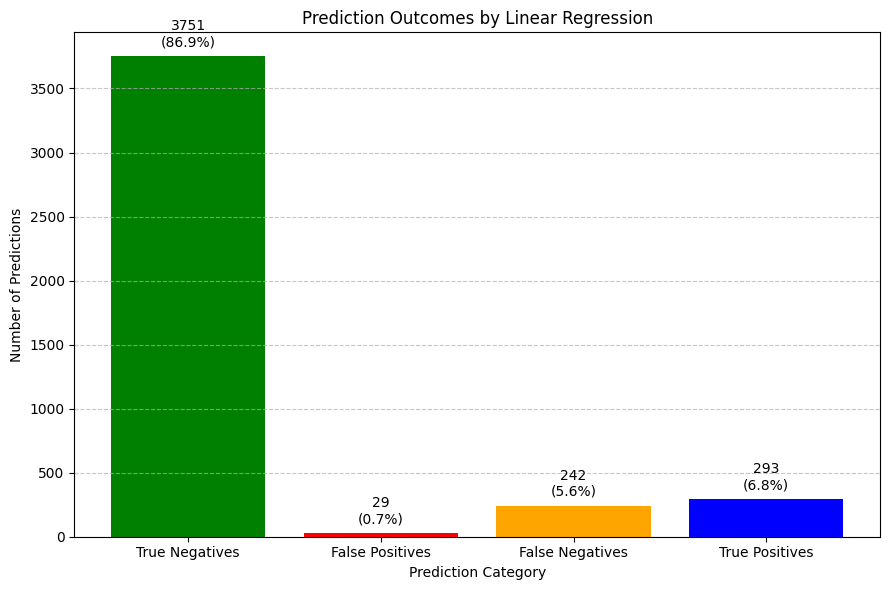

In [ ]:
# Compute confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()

labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn, fp, fn, tp]
colors = ['green', 'red', 'orange', 'blue']
total = sum(values)  # Total number of predictions

plt.figure(figsize=(9, 6))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    annotation = f"{height}\n({percentage:.1f}%)"
    plt.annotate(annotation,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.title('Prediction Outcomes by Linear Regression', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=10)
plt.xlabel('Prediction Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Support Vector Machine***

Starting hyperparameter optimization...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found: {'kernel': 'rbf', 'gamma': np.float64(0.01), 'C': np.float64(10.0)}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3780
           1       0.66      0.83      0.74       535

    accuracy                           0.93      4315
   macro avg       0.82      0.88      0.85      4315
weighted avg       0.94      0.93      0.93      4315


ROC AUC Score: 0.9413989022400238


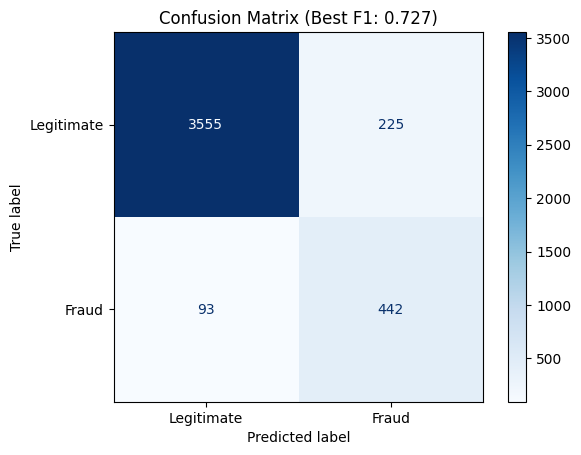

In [ ]:
df_encoded = df.copy()

# Data encoding
nominal_cols = ['purchase_city', 'purchase_state'] #used One-Hot encoding
for col in nominal_cols:
    counts = df_encoded[col].value_counts(normalize=True)
    df_encoded[col] = np.where(df_encoded[col].isin(counts[counts < 0.05].index),
                             'OTHER',
                             df_encoded[col])
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

high_cardinality_cols = ['merchant_name'] #using target encoding for high cardinality
encoder = TargetEncoder()
df_encoded[high_cardinality_cols] = encoder.fit_transform(
    df_encoded[high_cardinality_cols],
    df_encoded['is_fraud']
)

# Feature and Target column setting
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

# # Splitting Dataset for Testing and Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler() # scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning
param_dist = {   # Parameter distributions
    'C': np.logspace(-2, 2, 5),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    'kernel': ['rbf']
}

# Create base estimator with probability=True
base_svm = SVC(class_weight='balanced', random_state=42, probability=True)

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=base_svm,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Searching
print("Starting hyperparameter optimization...")
search.fit(X_train_scaled, y_train)

if hasattr(search, 'best_estimator_'):
    best_svm = search.best_estimator_
    print("\nBest parameters found:", search.best_params_)
else:
    raise RuntimeError("Hyperparameter search failed to complete")  # Check if search completed successfully

best_svm.set_params(probability=True)
best_svm.fit(X_train_scaled, y_train)

# Prediction
y_pred = best_svm.predict(X_test_scaled)
y_proba = best_svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=['Legitimate', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Best F1: {search.best_score_:.3f})")
plt.show()

# Feature importance for linear kernel
if best_svm.kernel == 'linear':
    feat_importances = pd.Series(best_svm.coef_[0], index=X.columns)
    feat_importances.abs().nlargest(20).plot(kind='barh')
    plt.title("Top 20 Most Important Features")
    plt.show()

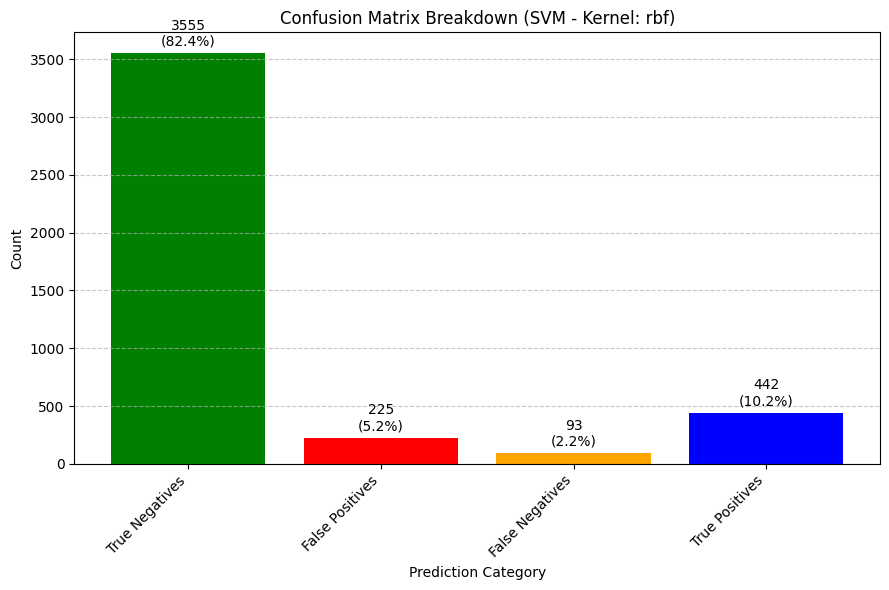

In [ ]:
# Compute confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn, fp, fn, tp]
colors = ['green', 'red', 'orange', 'blue']
total = sum(values) # Total number of predictions

plt.figure(figsize=(9, 6))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    height = bar.get_height()
    percentage = f'({height / total:.1%})'
    plt.annotate(f'{height}\n{percentage}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.title(f'Confusion Matrix Breakdown (SVM - Kernel: {best_svm.kernel})', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Prediction Category', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***XG Boost***


Classification Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3780
           1       0.94      0.91      0.92       535

    accuracy                           0.98      4315
   macro avg       0.96      0.95      0.96      4315
weighted avg       0.98      0.98      0.98      4315

ROC-AUC Score: 0.9929


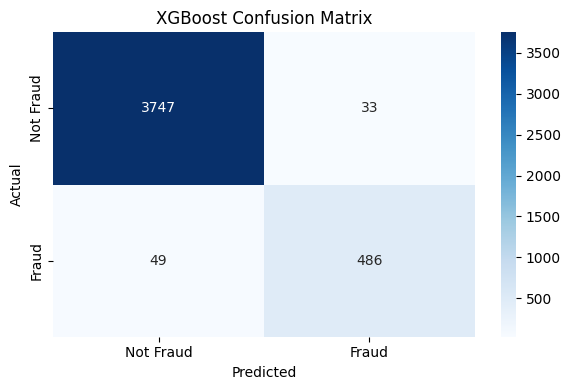

In [ ]:
df_encoded = df.copy()

# Data encoding
nominal_cols = ['purchase_city', 'purchase_state'] #used One Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

high_cardinality_cols = ['merchant_name'] #used target encoding for high cardinality
encoder = TargetEncoder()
df_encoded[high_cardinality_cols] = encoder.fit_transform(df_encoded[high_cardinality_cols], df_encoded['is_fraud'])

# Feature and Target column setting

X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

# Data Split for Test and Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler() # Scaling for XG Boost
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# Predcition
y_pred = xgb.predict(X_test_scaled)
y_pred_prob = xgb.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\nClassification Metrics:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()

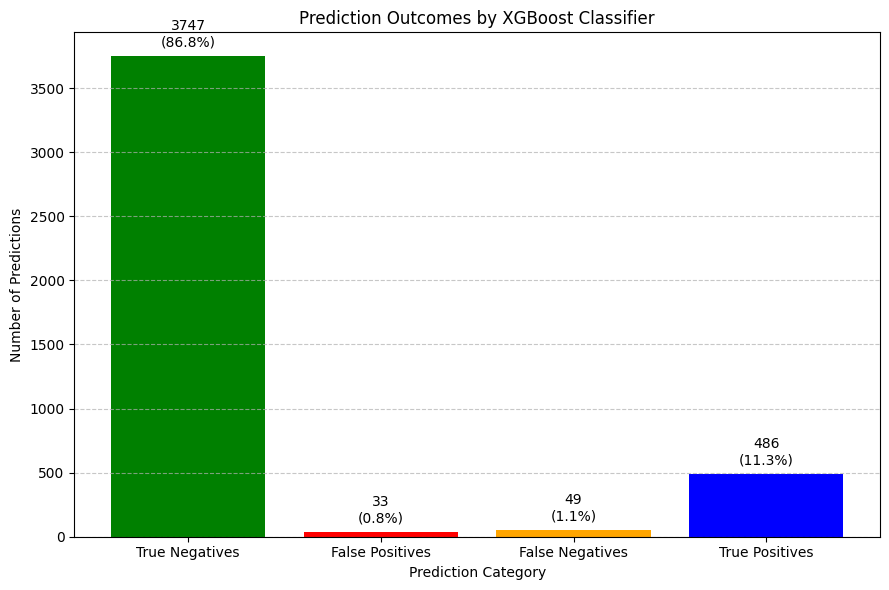

In [ ]:
# Use confusion matrix output
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn, fp, fn, tp]
colors = ['green', 'red', 'orange', 'blue']
total = sum(values) # Total number of predictions

plt.figure(figsize=(9, 6))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    annotation = f"{height}\n({percentage:.1f}%)"
    plt.annotate(annotation,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.title('Prediction Outcomes by XGBoost Classifier', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=10)
plt.xlabel('Prediction Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00


100%|===================| 4313/4315 [00:17<00:00]       

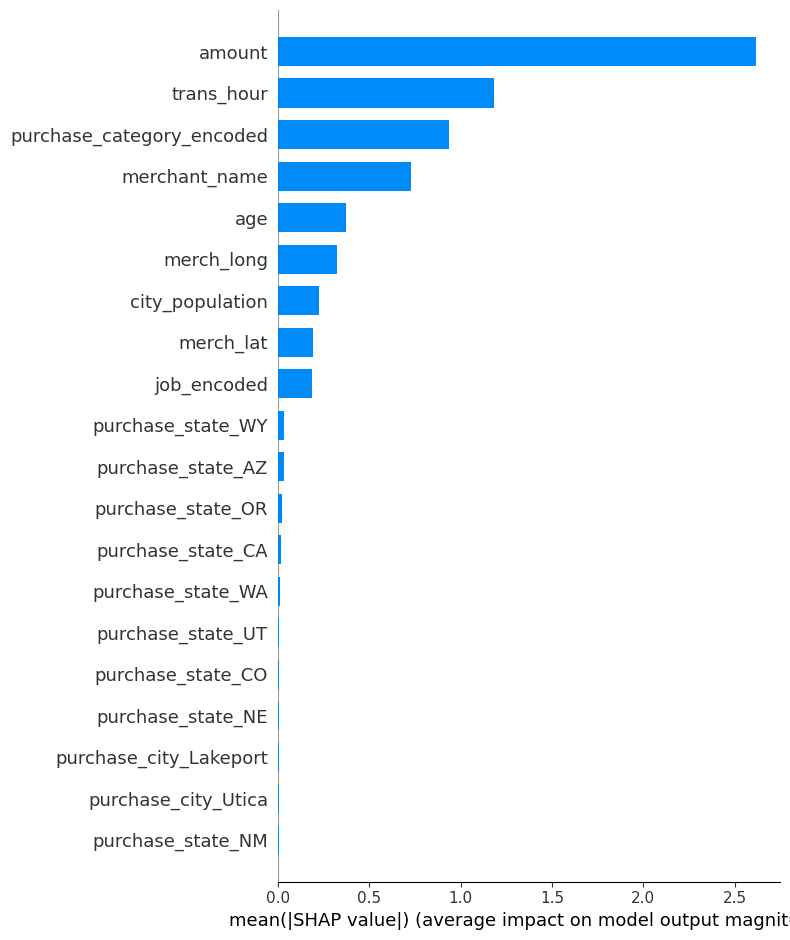

In [ ]:
!pip install shap

import shap

# Initialize the explainer
explainer = shap.Explainer(xgb, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

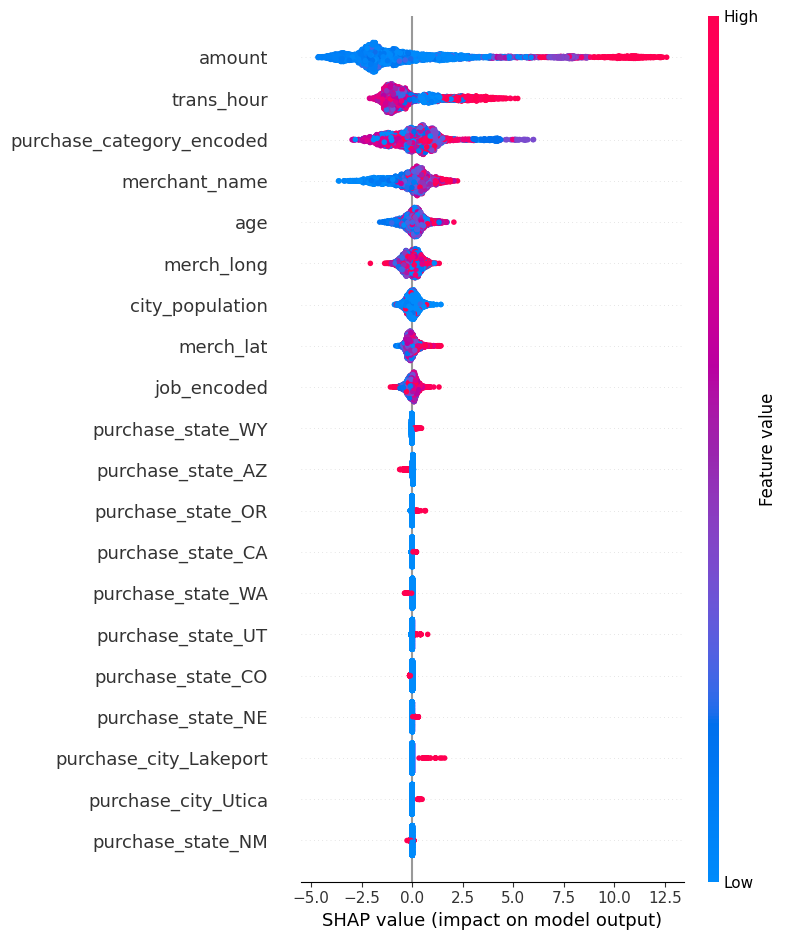

In [ ]:
# Full summary (beeswarm)
shap.summary_plot(shap_values, X_test)

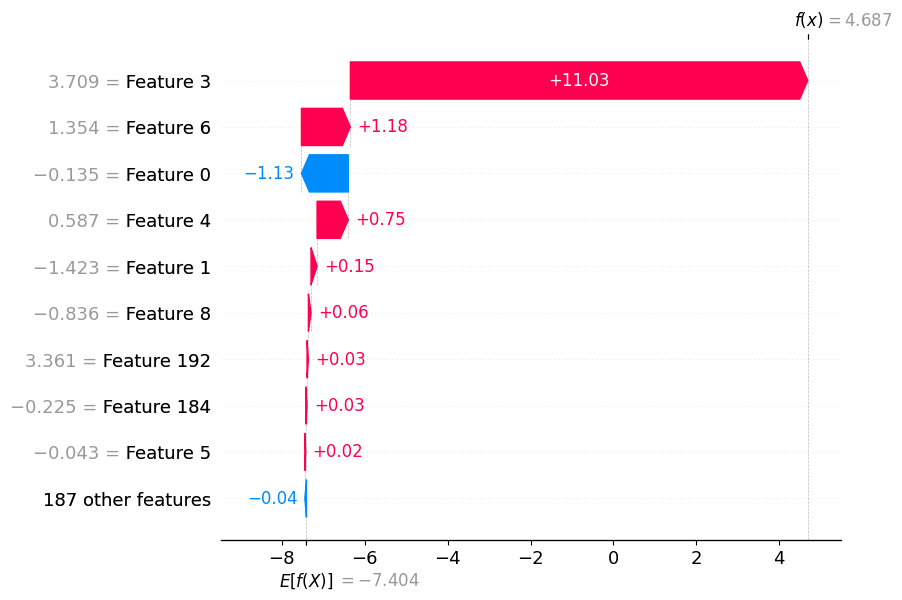

In [ ]:
# Explain a single prediction
shap.plots.waterfall(shap_values[0])

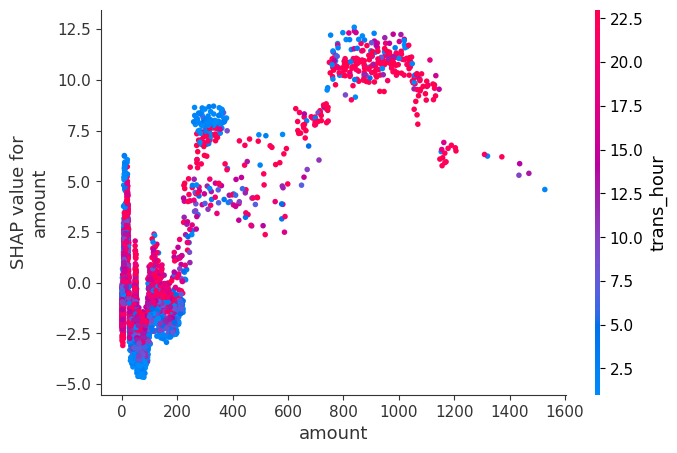

In [ ]:
# Dependence plot for a key feature (e.g., 'amount')
shap.dependence_plot('amount', shap_values.values, X_test)